In [50]:
import pandas as pd
from tensorflow import keras
# from matplotlib.pyplot import pyplot as pt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
import tensorflow as tf
%matplotlib inline

In [2]:
df = pd.read_csv("customer_churn.csv")

In [3]:
df.drop('customerID',axis='columns',inplace=True)
df[:5]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.dtypes


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
# changin data types of total charges 
df1 = df[df.TotalCharges != ' ']
df1[pd.to_numeric(df1.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


Text(0.5, 1.0, 'tenure chart')

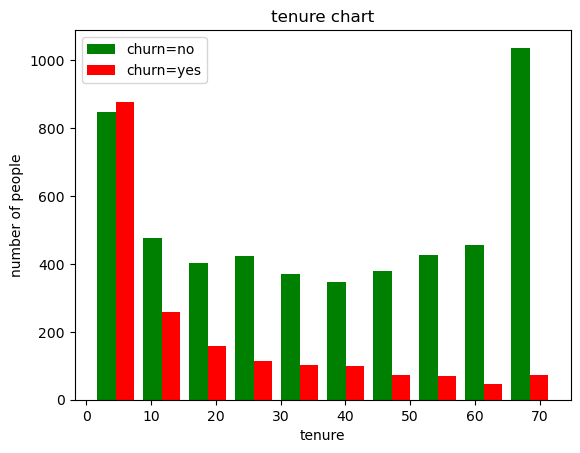

In [6]:
churn_yes_tenure = df1[df1.Churn == 'Yes'].tenure
churn_no_tenure = df1[df1.Churn == 'No'].tenure
plt.hist([churn_no_tenure,churn_yes_tenure],color=['green','red'],label=['churn=no','churn=yes'])
plt.xlabel("tenure")
plt.ylabel("number of people")
plt.legend()
plt.title("tenure chart")

In [7]:
print(df.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [8]:
for columns in df1.columns:
    print(f'{columns}: {df1[columns].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:

In [9]:
#data cleaning
df1.replace("No phone service","No",inplace = True)
df1.replace("No internet service","No",inplace = True)
# df1.replace("","No",inplace = True)

C:\Users\tejaswee\AppData\Local\Temp\ipykernel_19960\3553736002.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace("No phone service","No",inplace = True)
C:\Users\tejaswee\AppData\Local\Temp\ipykernel_19960\3553736002.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace("No internet service","No",inplace = True)


In [32]:
yes_no = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
          "DeviceProtection",'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no:
    df1[col].replace({'Yes':1,'No':0},inplace = True)

    
df1["gender"].replace({"Female":0,"Male":1},inplace= True)    

C:\Users\tejaswee\AppData\Local\Temp\ipykernel_19960\2659068674.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes':1,'No':0},inplace = True)
C:\Users\tejaswee\AppData\Local\Temp\ipykernel_19960\2659068674.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["gender"].replace({"Female":0,"Male":1},inplace= True)


In [33]:
#one hot encoding 
df2 = pd.get_dummies(data = df1,columns = ["InternetService","Contract","PaymentMethod"],dtype=float)

In [34]:
col_to_scale = ["tenure","MonthlyCharges","TotalCharges"]
scaler = MinMaxScaler()
df2[col_to_scale] = scaler.fit_transform(df2[col_to_scale])
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,0,0,0.464789,1,0,1,0,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1,0,0,0,0.014085,1,0,1,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,0,0,0,0.619718,0,0,1,0,1,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0,0,0,0,0.014085,1,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [35]:
x_pre = df2.drop("Churn" ,axis="columns")
y_pre = df2["Churn"]
x_train,x_test,y_train,y_test = train_test_split(x_pre,y_pre,test_size=0.20,random_state=5)
x_train.values


array([[0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [39]:

model = keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation = 'relu'),
    keras.layers.Dense(10,activation = 'relu'),
    keras.layers.Dense(8,activation = 'relu'),
    keras.layers.Dense(1,activation = 'sigmoid')
])

model.compile(optimizer = "adam",loss = "binary_crossentropy",metrics = ["accuracy"])
model.fit(x_train,y_train, epochs=50)


Epoch 1/50
176/176 [==============================] - 1s 1ms/step - loss: 0.4843 - accuracy: 0.7580
Epoch 2/50
176/176 [==============================] - 0s 1ms/step - loss: 0.4324 - accuracy: 0.7924
Epoch 3/50
176/176 [==============================] - 0s 1ms/step - loss: 0.4231 - accuracy: 0.7968
Epoch 4/50
176/176 [==============================] - 0s 1ms/step - loss: 0.4194 - accuracy: 0.7984
Epoch 5/50
176/176 [==============================] - 0s 1ms/step - loss: 0.4159 - accuracy: 0.8007
Epoch 6/50
176/176 [==============================] - 0s 1ms/step - loss: 0.4130 - accuracy: 0.8030
Epoch 7/50
176/176 [==============================] - 0s 1ms/step - loss: 0.4108 - accuracy: 0.8084
Epoch 8/50
176/176 [==============================] - 0s 1ms/step - loss: 0.4095 - accuracy: 0.8050
Epoch 9/50
176/176 [==============================] - 0s 1ms/step - loss: 0.4087 - accuracy: 0.8082
Epoch 10/50
176/176 [==============================] - 0s 1ms/step - loss: 0.4066 - accuracy: 0.8110

In [41]:
model.evaluate(x_test,y_test,)

44/44 [==============================] - 0s 1ms/step - loss: 0.4602 - accuracy: 0.7839


[0.4602184295654297, 0.7839374542236328]

In [ ]:
# we could convert predicted value of model to 0 0r 1 if > than 0.5

In [46]:
y_pred = model.predict(x_test)
y_predict = []
for y in y_pred:
    if(y>=0.5):
        y_predict.append(1)
    else:
        y_predict.append(0)
from sklearn.metrics import confusion_matrix , classification_report
print (classification_report(y_test,y_predict))

44/44 [==============================] - 0s 872us/step
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       999
           1       0.66      0.52      0.58       408

    accuracy                           0.78      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.77      0.78      0.78      1407



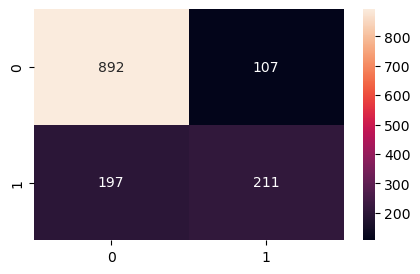

In [49]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels=y_test,predictions = y_predict)
plt.figure(figsize=(5,3))
sns.heatmap(cm,annot = True,fmt = 'd')
plt.xlabel =('predicted')
plt.ylabel = ('truth')